# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import pytemperature
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


# ######################################################################
# #FOR TESTING ONLY:
# cities = cities[0:10] 

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#1: define the basics:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={api_key}&q="


print('Beginning Data Retrieval')
# records_json = []
city_list = []
cloudiness_list = []
country_list = []
unfmt_date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_t_list = []
windspeed_list = []


#2: loop through each city and get their data:
rec_no = 1
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
#         records_json.append(response)
        city_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        unfmt_date_list.append(response['dt']) 
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_t_list.append(response['main']['temp_max'])
        windspeed_list.append(response['wind']['speed'])

        print(f"Processing Record {rec_no} of {len(cities)} | {city}")
    except:
        print(f"City ({city}) not found. Skipping to the next city")
    
    rec_no += 1


Beginning Data Retrieval
Processing Record 1 of 611 | gulbene
Processing Record 2 of 611 | strezhevoy
Processing Record 3 of 611 | hay river
Processing Record 4 of 611 | tizimin
Processing Record 5 of 611 | isangel
Processing Record 6 of 611 | bosaso
City (barentsburg) not found. Skipping to the next city
Processing Record 8 of 611 | torbay
Processing Record 9 of 611 | buala
Processing Record 10 of 611 | rikitea
Processing Record 11 of 611 | vaini
Processing Record 12 of 611 | saint-georges
Processing Record 13 of 611 | nanakuli
Processing Record 14 of 611 | castro
Processing Record 15 of 611 | ushuaia
Processing Record 16 of 611 | severo-kurilsk
Processing Record 17 of 611 | saint george
Processing Record 18 of 611 | kaeo
Processing Record 19 of 611 | hermanus
Processing Record 20 of 611 | hithadhoo
Processing Record 21 of 611 | kavieng
Processing Record 22 of 611 | redcar
Processing Record 23 of 611 | boende
Processing Record 24 of 611 | miri
City (longlac) not found. Skipping to the

Processing Record 200 of 611 | sao joao da barra
Processing Record 201 of 611 | butaritari
Processing Record 202 of 611 | east london
Processing Record 203 of 611 | komsomolskiy
Processing Record 204 of 611 | narsingdi
Processing Record 205 of 611 | gizo
Processing Record 206 of 611 | morondava
Processing Record 207 of 611 | ust-maya
Processing Record 208 of 611 | pangnirtung
Processing Record 209 of 611 | charters towers
Processing Record 210 of 611 | crestview
Processing Record 211 of 611 | cayenne
Processing Record 212 of 611 | san quintin
Processing Record 213 of 611 | college
Processing Record 214 of 611 | epiniana
Processing Record 215 of 611 | egvekinot
Processing Record 216 of 611 | thunder bay
Processing Record 217 of 611 | lumberton
Processing Record 218 of 611 | tanout
Processing Record 219 of 611 | amot
Processing Record 220 of 611 | shelburne
City (belushya guba) not found. Skipping to the next city
Processing Record 222 of 611 | portland
Processing Record 223 of 611 | ker

Processing Record 395 of 611 | katsuura
Processing Record 396 of 611 | coihaique
City (bolungarvik) not found. Skipping to the next city
Processing Record 398 of 611 | mundargi
Processing Record 399 of 611 | evensk
City (maarianhamina) not found. Skipping to the next city
Processing Record 401 of 611 | guhagar
Processing Record 402 of 611 | terra santa
Processing Record 403 of 611 | altdorf
Processing Record 404 of 611 | kultuk
Processing Record 405 of 611 | biloxi
Processing Record 406 of 611 | inhambane
City (bababe) not found. Skipping to the next city
Processing Record 408 of 611 | mecca
Processing Record 409 of 611 | ewa beach
Processing Record 410 of 611 | helsinki
Processing Record 411 of 611 | chokurdakh
Processing Record 412 of 611 | ternate
Processing Record 413 of 611 | vega de alatorre
Processing Record 414 of 611 | ocampo
Processing Record 415 of 611 | deputatskiy
Processing Record 416 of 611 | albanel
Processing Record 417 of 611 | adrar
Processing Record 418 of 611 | zho

Processing Record 590 of 611 | shadrinsk
Processing Record 591 of 611 | ganzhou
Processing Record 592 of 611 | erzurum
Processing Record 593 of 611 | saint-augustin
City (skalistyy) not found. Skipping to the next city
Processing Record 595 of 611 | north augusta
Processing Record 596 of 611 | nyzhni sirohozy
Processing Record 597 of 611 | liwale
Processing Record 598 of 611 | arona
Processing Record 599 of 611 | merauke
Processing Record 600 of 611 | marsh harbour
Processing Record 601 of 611 | porto novo
Processing Record 602 of 611 | trinidad
Processing Record 603 of 611 | port hardy
Processing Record 604 of 611 | yaan
Processing Record 605 of 611 | buloh kasap
Processing Record 606 of 611 | mount isa
Processing Record 607 of 611 | banjar
City (skagastrond) not found. Skipping to the next city
Processing Record 609 of 611 | cocorit
Processing Record 610 of 611 | ishigaki
Processing Record 611 of 611 | fort-shevchenko


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# CLEAN THE DATA!
# format the date:
fmt_date_list = pd.to_datetime(unfmt_date_list, unit = 's')
fmt_date_list

# format the max temp from kelvin to fahrenheit:
fmt_max_t_list = []
for x in max_t_list:
    fmt_max_t_list.append(pytemperature.k2f(x))
fmt_max_t_list

# Create a dictionary:
weather_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': fmt_date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': fmt_max_t_list,
    'Wind Speed': windspeed_list
}


# Create Data Frame:
weather_df = pd.DataFrame(weather_dict)

weather_df.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [5]:
# Export to csv:
weather_df.to_csv(output_data_file, header = True, mode = 'w', index = False)

# display the data frame:
weather_df.head()
   
    

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gulbene,0,LV,2019-07-07 03:33:11,95,57.18,26.75,46.34,0.69
1,Strezhevoy,99,RU,2019-07-07 03:33:12,93,60.73,77.60,58.98,2.00
2,Hay River,75,CA,2019-07-07 03:33:12,93,60.82,-115.79,58.98,3.60
3,Tizimin,17,MX,2019-07-07 03:33:12,83,21.14,-88.15,77.41,2.25
4,Isangel,75,VU,2019-07-07 03:33:13,78,-19.55,169.27,80.58,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

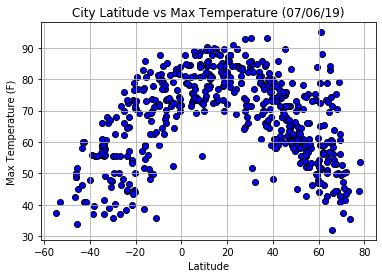

In [6]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Max Temperature ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_MaxTemp.png')

#### Latitude vs. Humidity Plot

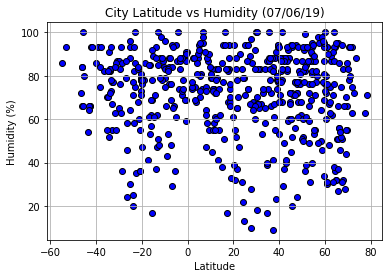

In [7]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Humidity ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

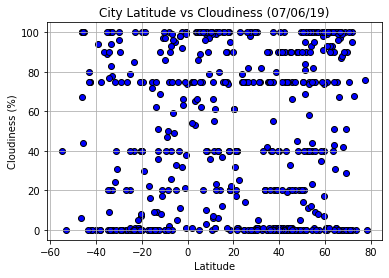

In [8]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Cloudiness ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

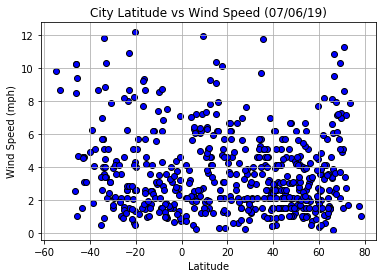

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o', color = 'blue', edgecolor = 'black')

plt.title(f"City Latitude vs Wind Speed ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Latitude_vs_WindSpeed.png')

In [ ]:
# * You must include a written description of three observable trends based on the data.

# 1. Latitude vs. Temperature Plot

#     The closer the city is to the equator, the hotter the temperature. 
#     It also appears that there are more cities between the equator and latitude 
#     20 than there are between the equator and latitude -20, meaning there are 
#     more cities in the northern side of the equator.

# 2. Latitude vs. Humidity Plot

#     Humidity seems generally high for cities in all latitudes. Perhaps this is 
#     because us human beings need some level of humidity to survive. Again, it 
#     looks like there is a general trend for the northern cities to have high 
#     humidity. The desert areas are typically uninhabitable, so perhaps people 
#     tend to live in more northern areas. 

# 3. Latitude vs. Cloudiness Plot

#     There is no correlation here because the plots are much too scattered.

# 4. Latitude vs. Wind Speed Plot

#     The majorty of the cities are located in low wind speed areas in all latitudes. 
#     This would make sense from a survival perspective as well: It would be 
#     difficult to live in super windy locations. 

# Lastly, it would be interesting to investigate if there is a correlation between 
# temperature and humidity or between cloudiness and humidity. I may be wrong but 
# I would expect to see more cities in high temperature and high humidity than high 
# temperature and low humidity. As for the cloudiness factor: I would expect to see
# high cloudiness correlate with high humidity. But again, I may be wrong, so this 
# would be interesting to investigate next. 


